In [0]:
#Connexion au drive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

## Merging df

In [0]:
import pandas as pd

### CO2 Emissions

In [0]:
## Emissions
downloaded = drive.CreateFile({'id': '1puvKwBbcCz5FmckzUNw0ZQX44aG9l9wj'})
downloaded.GetContentFile('Emission_CO2(kt).csv')
dataCO2emissions = pd.read_csv('Emission_CO2(kt).csv')

In [0]:
# Import GlobalLandTemperatures.csv
downloaded = drive.CreateFile({'id': '1d7B5tzg_pmQ453Ocoop41DP475D4Wsbx'})
downloaded.GetContentFile('GlobalLandTemperatures.csv')
dataGlobalTemp = pd.read_csv('GlobalLandTemperatures.csv')

In [0]:
df1 = dataCO2emissions[dataCO2emissions['Country Name'] == 'World']
df1.head(10)

,Country Name,Country Code,Year,Value
2310,World,WLD,1960,9.396706e+06
2311,World,WLD,1961,9.434403e+06
2312,World,WLD,1962,9.818840e+06
2313,World,WLD,1963,1.035575e+07
2314,World,WLD,1964,1.094701e+07
2315,World,WLD,1965,1.143344e+07
2316,World,WLD,1966,1.200945e+07
2317,World,WLD,1967,1.238969e+07
2318,World,WLD,1968,1.301719e+07
2319,World,WLD,1969,1.379712e+07


In [0]:
df1 = df1[['Year', 'Value']]
df1.head()

,Year,Value
2310,1960,9.396706e+06
2311,1961,9.434403e+06
2312,1962,9.818840e+06
2313,1963,1.035575e+07
2314,1964,1.094701e+07


In [0]:
df1.Year.max()

2014

### Global temp

In [0]:
dataGlobalTemp['dt'] = pd.to_datetime(dataGlobalTemp['dt'])
dataGlobalTemp['YEAR'] = pd.DatetimeIndex(dataGlobalTemp['dt']).year

In [0]:
dataGlobalTemp = dataGlobalTemp.set_index('dt')

In [0]:
df2 = dataGlobalTemp.groupby('YEAR').mean()
df2.head(10)

,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty
YEAR,,,,,,,,
1750,8.719364,2.637818,NaN,NaN,NaN,NaN,NaN,NaN
1751,7.976143,2.781143,NaN,NaN,NaN,NaN,NaN,NaN
1752,5.779833,2.977000,NaN,NaN,NaN,NaN,NaN,NaN
1753,8.388083,3.176000,NaN,NaN,NaN,NaN,NaN,NaN
1754,8.469333,3.494250,NaN,NaN,NaN,NaN,NaN,NaN
1755,8.355583,3.850333,NaN,NaN,NaN,NaN,NaN,NaN
1756,8.849583,3.262333,NaN,NaN,NaN,NaN,NaN,NaN
1757,9.022000,4.026000,NaN,NaN,NaN,NaN,NaN,NaN
1758,6.743583,3.362917,NaN,NaN,NaN,NaN,NaN,NaN


In [0]:
dataGlobalTemp.head(10)

,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty,YEAR
dt,,,,,,,,,
1750-01-01,3.034,3.574,NaN,NaN,NaN,NaN,NaN,NaN,1750
1750-02-01,3.083,3.702,NaN,NaN,NaN,NaN,NaN,NaN,1750
1750-03-01,5.626,3.076,NaN,NaN,NaN,NaN,NaN,NaN,1750
1750-04-01,8.490,2.451,NaN,NaN,NaN,NaN,NaN,NaN,1750
1750-05-01,11.573,2.072,NaN,NaN,NaN,NaN,NaN,NaN,1750
1750-06-01,12.937,1.724,NaN,NaN,NaN,NaN,NaN,NaN,1750
1750-07-01,15.868,1.911,NaN,NaN,NaN,NaN,NaN,NaN,1750
1750-08-01,14.750,2.231,NaN,NaN,NaN,NaN,NaN,NaN,1750
1750-09-01,11.413,2.637,NaN,NaN,NaN,NaN,NaN,NaN,1750


In [0]:
df2_1 = pd.DataFrame(df2['LandAndOceanAverageTemperature'])
df2_1.dropna(inplace=True)
df2 = df2_1.copy()
df2_1

,LandAndOceanAverageTemperature
YEAR,
1850,14.867167
1851,14.991833
1852,15.006500
1853,14.955167
1854,14.991000
...,...
2011,15.769500
2012,15.802333
2013,15.854417


In [0]:
df2_2 = pd.DataFrame(df2['LandAverageTemperature'])
df2_2

KeyError: ignored

In [0]:
df2_1 = df2_1[(df2_1.index > 1959) & (df2_1.index < 2015)]

### Merge df1 et df2_1

In [0]:
df1.rename(columns={"Year": "YEAR", 'Value':'CO2'}, inplace=True)
df1.set_index('YEAR', inplace=True)
df1.head()

,CO2
YEAR,
1960,9.396706e+06
1961,9.434403e+06
1962,9.818840e+06
1963,1.035575e+07
1964,1.094701e+07


In [0]:
df2_1 = df2_1.rename(columns={'LandAndOceanAverageTemperature':'Global_Avg_Temp'})
df2_1.head()

,Global_Avg_Temp
YEAR,
1960,15.291917
1961,15.379917
1962,15.325583
1963,15.376667
1964,15.117083


In [0]:
df_co2_temp = df1.merge(df2_1, left_index=True, right_index=True)

## Graphs

### CO2 and Temperature


In [0]:
df_co2_temp.head()

In [0]:
df_co2_temp['CO2 (Gt)'] = df_co2_temp['CO2']*1e-7
df_co2_temp.head()

,CO2,Global_Avg_Temp,CO2 (Gt)
YEAR,,,
1960,9.396706e+06,15.291917,0.939671
1961,9.434403e+06,15.379917,0.943440
1962,9.818840e+06,15.325583,0.981884
1963,1.035575e+07,15.376667,1.035575
1964,1.094701e+07,15.117083,1.094701


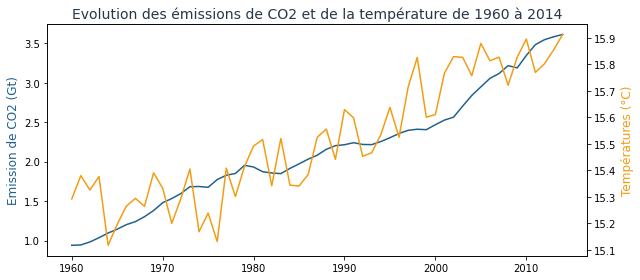

In [0]:
import matplotlib.pyplot as plt

fig, ax1 = plt.subplots(figsize = (9, 4))
ax1.plot(df_co2_temp.index, 'CO2 (Gt)', data = df_co2_temp, color = '#1F618D')
ax1.set_ylabel('Emission de CO2 (Gt)', {'fontsize':12, 'color':'#1F618D'})

ax2 = ax1.twinx()
ax2.plot(df_co2_temp.index, 'Global_Avg_Temp', data = df_co2_temp, color = '#F39C12')
ax2.set_ylabel('Températures (°C)', {'fontsize':12, 'color':'#F39C12'})
ax1.set_title('Evolution des émissions de CO2 et de la température de 1960 à 2014', {'fontsize':14, 'color':'#283747'})
fig.tight_layout()
plt.show()

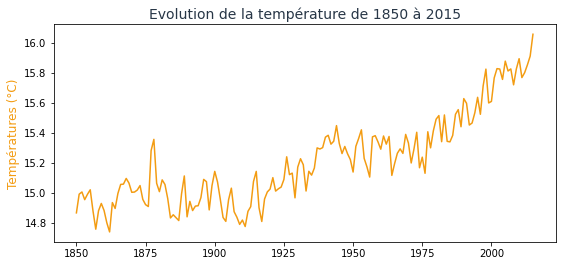

In [0]:
fig, ax1 = plt.subplots(figsize = (9, 4))
ax1.plot(df2.index, 'LandAndOceanAverageTemperature', data = df2, color = '#F39C12')
ax1.set_ylabel('Températures (°C)', {'fontsize':12, 'color':'#F39C12'})
ax1.set_title('Evolution de la température de 1850 à 2015', {'fontsize':14, 'color':'#283747'})
plt.show()

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


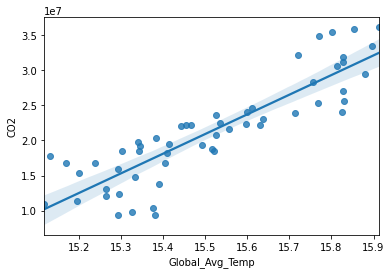

In [0]:
import seaborn as sns
sns.regplot('Global_Avg_Temp', 'CO2', data = df_co2_temp)
plt.show()

### CO2 corrélation

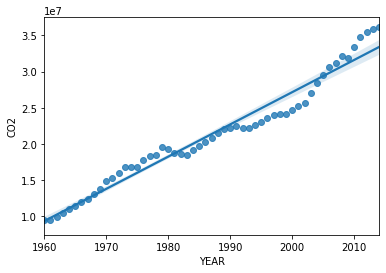

In [0]:
sns.regplot(df_co2_temp.index, 'CO2', data = df_co2_temp)
plt.show()

### Temperatures corrélation

#### De 1960 à 2014

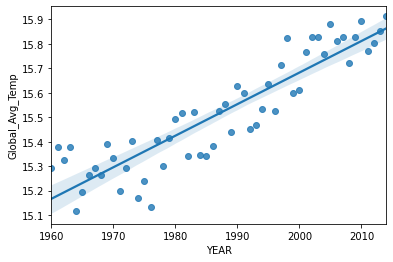

In [0]:
sns.regplot(df_co2_temp.index, 'Global_Avg_Temp', data = df_co2_temp)
plt.show()

#### de 1850 à 2015

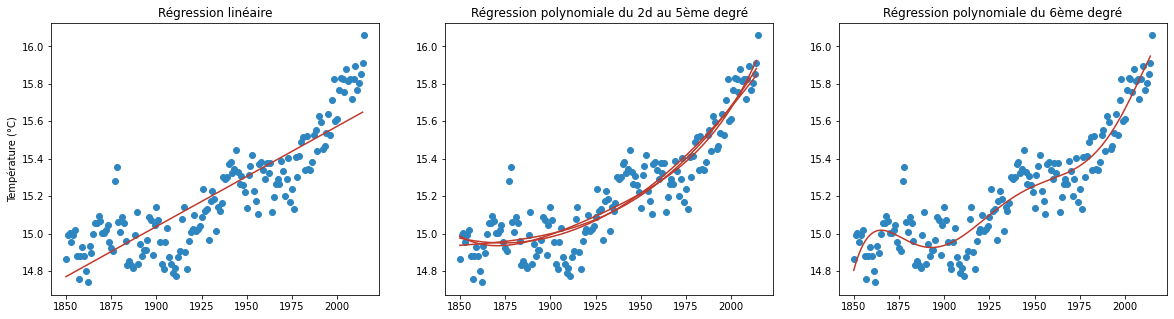

In [0]:
import numpy as np

# Paramètres du modèle
Xaxis = df2.index
Yaxis = df2['LandAndOceanAverageTemperature']
Xmin = Xaxis.min()
Xmax = Xaxis.max()
array = np.arange(Xmin, Xmax)

fig, ax = plt.subplots(1, 3, figsize = (20, 5))

ax[0].scatter(x = df2.index, y = 'LandAndOceanAverageTemperature', data = df2, c = '#2E86C1')
ax[0].plot(array, np.poly1d(np.polyfit(x = Xaxis, y = Yaxis, deg = 1))(array), c = '#C0392B')
ax[0].set_title('Régression linéaire')
ax[0].set_ylabel('Température (°C)')

ax[1].scatter(x = df2.index, y = 'LandAndOceanAverageTemperature', data = df2, c = '#2E86C1')
for i in range(2, 5):
  ax[1].plot(array, np.poly1d(np.polyfit(x = Xaxis, y = Yaxis, deg = i))(array), c = '#C0392B')
ax[1].set_title('Régression polynomiale du 2d au 5ème degré')

ax[2].scatter(x = df2.index, y = 'LandAndOceanAverageTemperature', data = df2, c = '#2E86C1')
#ax[2].plot(df2.index, 'LandAndOceanAverageTemperature', data = df2, c = '#F39C12')
ax[2].plot(array, np.poly1d(np.polyfit(x = Xaxis, y = Yaxis, deg = 6))(array), c = '#C0392B')
ax[2].set_title('Régression polynomiale du 6ème degré')

plt.show()

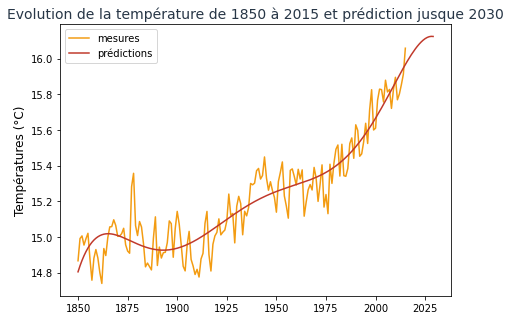

In [0]:
fig, ax = plt.subplots(figsize = (7, 5))
array = np.arange(Xmin, 2030)
_ = plt.plot(df2.index, 'LandAndOceanAverageTemperature', data = df2, c = '#F39C12')
_ = plt.plot(array, np.poly1d(np.polyfit(x = Xaxis, y = Yaxis, deg = 6))(array), c = '#C0392B')
plt.ylabel('Températures (°C)', {'fontsize':12})
plt.title('Evolution de la température de 1850 à 2015 et prédiction jusque 2030', {'fontsize':14, 'color':'#283747'})
plt.legend(['mesures', 'prédictions'])
plt.show()